# Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dnd-5e-monster-manual-stats/cleaned_monsters_basic.csv


In [2]:
df = pd.DataFrame(pd.read_csv('/kaggle/input/dnd-5e-monster-manual-stats/cleaned_monsters_basic.csv'))
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,name,size,monster_type,alignment,ac,hp,strength,str_mod,dex,dex_mod,...,perception,stealth,persuasion,insight,deception,arcana,religion,acrobatics,athletics,intimidation
0,Aboleth,Large,Aberration,lawful evil,17,135,21,5,9,-1,...,10,0,0,0,0,0,0,0,0,0
1,Acolyte,Medium,Humanoid (any race),any alignment,10,9,10,0,10,0,...,0,0,0,0,0,0,0,0,0,0
2,Adult Black Dragon,Huge,Dragon,chaotic evil,19,195,23,6,14,2,...,11,7,0,0,0,0,0,0,0,0
3,Adult Blue Dragon,Huge,Dragon,lawful evil,19,225,25,7,10,0,...,12,5,0,0,0,0,0,0,0,0
4,Adult Brass Dragon,Huge,Dragon,chaotic good,18,172,23,6,10,0,...,11,5,8,0,0,0,0,0,0,0


In [3]:
# fill null
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(0)
df.head()

,name,size,monster_type,alignment,ac,hp,strength,str_mod,dex,dex_mod,...,perception,stealth,persuasion,insight,deception,arcana,religion,acrobatics,athletics,intimidation
0,Aboleth,Large,Aberration,lawful evil,17,135,21,5,9,-1,...,10,0,0,0,0,0,0,0,0,0
1,Acolyte,Medium,Humanoid (any race),any alignment,10,9,10,0,10,0,...,0,0,0,0,0,0,0,0,0,0
2,Adult Black Dragon,Huge,Dragon,chaotic evil,19,195,23,6,14,2,...,11,7,0,0,0,0,0,0,0,0
3,Adult Blue Dragon,Huge,Dragon,lawful evil,19,225,25,7,10,0,...,12,5,0,0,0,0,0,0,0,0
4,Adult Brass Dragon,Huge,Dragon,chaotic good,18,172,23,6,10,0,...,11,5,8,0,0,0,0,0,0,0


# Explore

<AxesSubplot:title={'center':'AC by creature size'}, xlabel='size'>

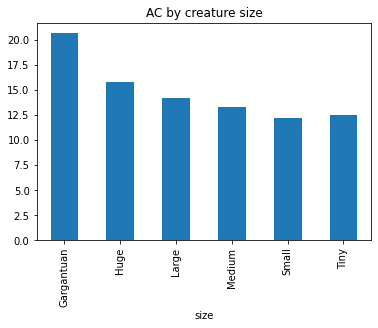

In [4]:
df.groupby('size')['ac'].mean().plot.bar(title='AC by creature size')

<AxesSubplot:title={'center':'Challenge by creature size'}, xlabel='size'>

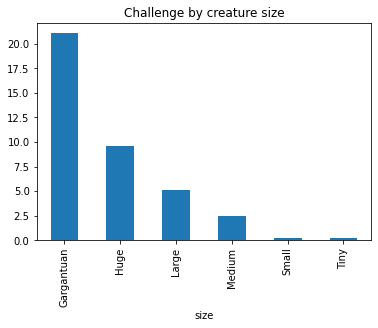

In [5]:
# convert 'cr' to float
df['cr'] = df['cr'].str.replace('1/8','.125')
df['cr'] = df['cr'].str.replace('1/4','.25')
df['cr'] = df['cr'].str.replace('1/2','.5')
df['cr'] = df['cr'].astype('float')

df.groupby('size')['cr'].mean().plot.bar(title='Challenge by creature size')

In [6]:
round(df.groupby('cr',0)[numeric_columns].mean(),2)

,ac,hp,strength,str_mod,dex,dex_mod,con,con_mod,intel,int_mod,...,perception,stealth,persuasion,insight,deception,arcana,religion,acrobatics,athletics,intimidation
cr,,,,,,,,,,,,,,,,,,,,,
0.000,11.07,3.41,4.79,-2.79,12.28,0.86,9.90,-0.24,2.66,-3.90,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0
0.125,12.42,8.47,9.89,-0.37,13.37,1.53,11.37,0.42,5.00,-2.63,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0
0.250,11.78,14.97,11.00,0.28,12.78,1.19,11.62,0.66,4.59,-2.91,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0
0.500,12.42,20.42,11.21,0.33,12.45,1.03,12.24,0.94,5.03,-2.73,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0
1.000,12.88,28.08,13.52,1.44,13.68,1.56,12.68,1.04,6.12,-2.16,...,0.32,0.20,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0
2.000,12.98,47.32,15.61,2.56,12.24,0.98,14.29,1.93,6.66,-1.93,...,0.63,0.32,0.00,0.00,0.10,0.00,0.00,0.0,0.10,0.0
3.000,14.30,59.30,16.60,3.05,12.65,1.10,14.95,2.25,7.85,-1.30,...,0.40,0.30,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0
4.000,13.38,80.69,14.92,2.23,12.62,1.00,15.00,2.15,10.31,-0.08,...,0.31,0.15,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0
5.000,14.84,99.36,17.56,3.64,12.28,0.88,17.44,3.52,7.28,-1.60,...,0.44,0.24,0.00,0.20,0.20,0.00,0.00,0.0,0.40,0.2


<AxesSubplot:title={'center':'Number of creatures by CR'}, xlabel='cr'>

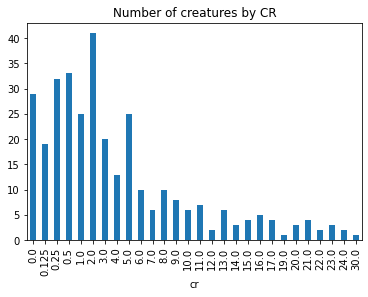

In [7]:
df.groupby('cr').size().plot.bar(title='Number of creatures by CR')

In [8]:
round(df.groupby('cr',0)[numeric_columns].median(),2)

,ac,hp,strength,str_mod,dex,dex_mod,con,con_mod,intel,int_mod,...,perception,stealth,persuasion,insight,deception,arcana,religion,acrobatics,athletics,intimidation
cr,,,,,,,,,,,,,,,,,,,,,
0.000,11.0,3.0,3.0,-4.0,13.0,1.0,10.0,0.0,2.0,-4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.125,12.0,9.0,11.0,0.0,14.0,2.0,11.0,0.0,3.0,-4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.250,12.0,13.0,12.0,1.0,14.0,2.0,12.0,1.0,2.5,-4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.500,12.0,22.0,13.0,1.0,13.0,1.0,12.0,1.0,3.0,-4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000,12.0,26.0,15.0,2.0,14.0,2.0,13.0,1.0,6.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.000,13.0,45.0,17.0,3.0,12.0,1.0,15.0,2.0,6.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.000,14.0,58.0,16.5,3.0,13.0,1.0,15.0,2.0,8.0,-1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.000,13.0,78.0,16.0,3.0,13.0,1.0,16.0,3.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.000,15.0,95.0,18.0,4.0,11.0,0.0,17.0,3.0,6.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Basic ML

In [9]:
# feature selection
features_df = df.copy()
target = features_df.pop('cr')
selected_features = features_df

print(selected_features.shape, target.shape)

(324, 43) (324,)


In [10]:
# one hot encoder and scaler for pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

ct = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=object))
)

ct.fit_transform(selected_features)

<324x591 sparse matrix of type '<class 'numpy.float64'>'
	with 13932 stored elements in Compressed Sparse Row format>

In [11]:
# split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features, 
                                                    target, 
                                                    random_state=42)

In [12]:
# build pipeline
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.pipeline import make_pipeline

model = LinearRegression()

pipe = make_pipeline(ct, model)

In [13]:
pipe.fit(X_train, y_train)

train_score = pipe.score(X_train, y_train)
test_score = pipe.score(X_test, y_test)
preds = pipe.predict(X_test)

print(f'Train score: {train_score}')
print(f'Test score: {test_score}')

Train score: 0.9999999999999423
Test score: 0.9443661143955197
